# Benchmarking
The purpose of this notebook is to benchmark the performance of see-classify on different datasets.
The figures in this notebook were generated by see-classify with has `1729ec21b8e884e61da78fe03b714cc7dd443692`.

In [1]:
from figures_markdown_snippets import show_data_instructions

show_data_instructions()


To generate data, run:
- for sklearn
    ```bash
sbatch generate_sklearn_data.sb -n 10 -p 10
    ```
- for dhahri
    ```bash
sbatch generate_dhahri_data.sb -n 20 -p 100 -t 30
    ```
These commands generate files for running genetic search using 10 generations and population size of 10
for the sklearn tutorial and 20 generations with population size of 100
for the Breast Cancer Wisconsin (Diagnostic) Dataset respectively.

The `-n`, `-p`, `-t` flags control number of generations, population sizes, 
and number of trials respectively.

The data generated tracks the top 10 individuals and the population by
each generation and is stored in the corresponding output 
(i.e. the slurm_\[id\].out file).

To extract this data to a csv file, run:
- for the top 10 individuals:
    ```bash
grep "# GEN HOF_index" slurm_[id].out | cut -d '|' -f2 > "filename_1.csv"
    ```
- for the population:
    ```bash
grep "# GEN population_index" slurm_[id].out | cut -d '|' -f2 > "filename_2.csv"
    ```
    
If one has multiple output files that contain different trials of the same
type of GA run, one could try the moving all the relevant files into 
one directory, changing to that directory, and running the following commands instead:
- for the top 10 individuals:
    ```bash
grep "# GEN HOF_index" *.out | cut -d '|' -f2 > "filename_1.csv"
    ```
- for the population:
    ```bash
grep "# GEN population_index" *.out | cut -d '|' -f2 > "filename_2.csv"
    ```


In [2]:
# Path hack so that we can import see library.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

Set output filenames to build figures

In [3]:
population_datasets = [
    "../data/0802_sklearn_data/circles_population_100_100.csv",
    "../data/0802_sklearn_data/linearly_separable_population_100_100.csv",
    "../data/0802_sklearn_data/moons_population_100_100.csv",
]

hof_datasets = [
    "../data/0802_sklearn_data/circles_hof_100_100.csv",
    "../data/0802_sklearn_data/linearly_separable_hof_100_100.csv",
    "../data/0802_sklearn_data/moons_hof_100_100.csv",
]

In [4]:
# Describe these runs
ds_names = ["Circles", "Linearly Separable", "Moons"]
tutorial_best = [0.075, 0.05, 0.025]

num_gen = 100
num_trials = 100
pop_size = 100
hof_size = 10

CPU times: user 1min 7s, sys: 412 ms, total: 1min 8s
Wall time: 1min 8s


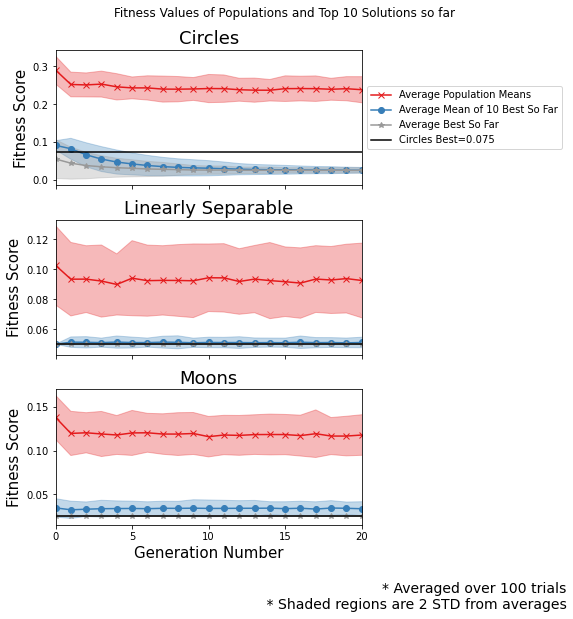

In [8]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from figures_helpers import plot_generation_fitness

fig, axs = plt.subplots(3, sharex=True, figsize=(8, 8))

fig.suptitle("Fitness Values of Populations and Top 10 Solutions so far")

for i in range(3):
    plot_generation_fitness(
        population_datasets[i],
        hof_datasets[i],
        num_gen,
        pop_size,
        num_trials,
        hof_size,
        axs=axs[i],
    )

    # Format subplots
    axs[i].set_title(ds_names[i], fontdict={"fontsize": 18})

    # Set axis labels
    axs[i].set_ylabel("Fitness Score", fontdict={"fontsize": 15})
    if i == 2:
        axs[i].set_xlabel("Generation Number", fontdict={"fontsize": 15})
    else:
        axs[i].set_xlabel("")

    # Plot tutorial best
    generation = list(range(0, num_gen + 1))
    best = np.repeat(tutorial_best[i], num_gen + 1)

    axs[i].plot(generation, best, "k-", label=f"{ds_names[i]} Best={tutorial_best[i]}")

    axs[i].set_xlim(0, 20)
    axs[i].set_xticks(list(range(0, 21, 5)))

    # Format legend
    if i == 0:
        axs[i].legend(loc="center left", bbox_to_anchor=(1, 0.5))
    else:
        axs[i].get_legend().remove()

# Add caption
plt.figtext(
    0.99,
    -0.065,
    "* Averaged over 100 trials\n * Shaded regions are 2 STD from averages",
    horizontalalignment="right",
    fontdict={"fontsize": 14},
)

plt.tight_layout()